# Exercices de visualisation pour débutant
Bienvenue à l'atelier de visualisation de données en python. Ce travail vous permettra de mettre en pratique les concepts clefs appris lors de la présentation sur le sujet. 

Premièrement, essayer de compiler la cellule ci-dessous pour vérifier que les *package* ont bien été installés. Avec Jupyter notebook il suffit d'appuyer sur Ctrl + Enter ou Shift + Enter en étant dans la cellule pour compiler une cellule.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

De plus, avec Jupyter, vous n'avez pas besoin de mettre de `print` pour afficher le résultat de la dernière fonction ou la dernière variable, exemple :

In [3]:
'Hello world'

'Hello world'

In [4]:
'Hello world'
'Hello world 2'

'Hello world 2'

Toutefois, si `print` n'est pas utilisé, les variables non-assignées sont affichées seulement si elles se trouvent à la dernière ligne de code.

In [5]:
'Hello world'
print('printed Hello world')
33

printed Hello world


33

## Partie 1 Analyse de données
### Base de données : *Penguins*!
![Artwork by @allison_horst](../assets/penguins.png)
Artwork by @allison_horst

La base de données utilisée pour cette exercice est la base de donnée gratuite *Palmer Archipelago's penguin*. Celle-ci regroupe des données multivariées de 3 espèces de manchots répartis sur l'archipel de Palmer en Antarctique et se veut un excellent outil d'introduction à la visualisation.

Dans la cellule suivante, commencez par charger la base de données avec `pandas` et afficher sa taille avec `shape`.

> Les données sont sauvegardées dans le répertoire sous le nom de `palmerpenguins.csv`

> Le code écrit dans une cellule précédente est accessible dans toutes les cellules en bas, donc pas besoin de refaire `import pandas as pd`

In [6]:
data = pd.read_csv('palmerpenguins.csv')
data.shape

(344, 18)

Vous devriez maintenant voir le nombre d'individus ainsi que le nombre de variables dans la base de données. La première étape de la visualisation est de comprendre les données avec lesquels on travaille pour choisir les bonnes figures plus tard. La méthode la plus simple est d'afficher certaines données.


Dans la cellule suivante, affichez les cinq premières lignes ainsi que l'entête de la base de données. 

In [7]:
data.head()

,Unnamed: 0,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


Vous devriez maintenant remarquer que la base de données possède des variables discrètes (`Clutch Completion`, `Sex`, `Island`, `Region`, `Species`), d'autres variables continues (`Culmen Length`, `Culmen Depth`, `Flipper Length`, *etc.*) et d'autres colonnes qui ne seront pas utiles dans le cadre de cet exercice. Un autre détail que vous devriez être en mesure d'observer est la présence de `NaN`, qui sont des données manquantes. Les données manquantes se retrouvent essentiellement dans toutes les bases de données. Savoir comment les gérer est un art en soi et ne sera pas traité dans l'atelier par souci de temps. Vous pourrez donc ignorer les `NaN`, mais gardez en tête leur présence lors des prochains exercices, puisqu'ils peuvent causer des erreurs. Pour diriger vos choix, vous pouvez faire afficher les données manquantes dans chaque colonnes :

In [8]:
data.isna().sum()

Unnamed: 0               0
studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

### Analyse de variables discrètes : Le diagramme à bande
Pour comparer des données catégoriques, l'outil principal est le diagramme à bande. En utilisant `plt.bar` afficher un diagramme à bande pour la variable `Sex`, un autre pour `Island` et un dernier pour `Species`:

> Pour tous les exercices, nous nous attendons à ce que les axes soient convenablement nommés avec les unités au besoin

> Exercice optionnelle : Si vous êtes à l'aise essayez d'utiliser une boucle!

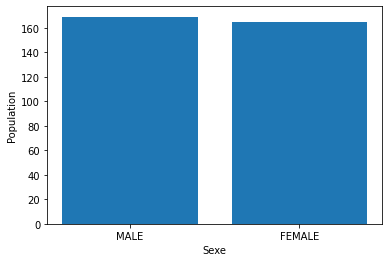

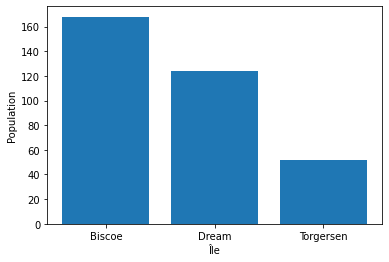

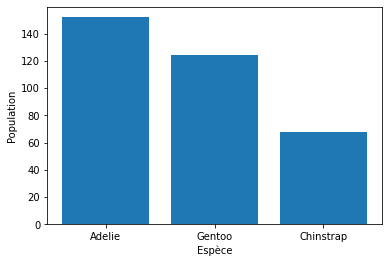

In [9]:
variables = ['Sex', 'Island', 'Species']
xaxis_title = {'Sex':'Sexe', 'Island': 'Île', 'Species':'Espèce'}
for var in variables:
    counts = data[var].value_counts(dropna=True)#Calcul le nombre de manchos dans chaque catégorie de la colonne 'var' 
    label = counts.index
    values = counts.values
    plt.bar(x=label, height=values)
    plt.ylabel('Population')
    plt.xlabel(xaxis_title[var])
    plt.show()

Vous devriez maintenant être en mesure d'observer qu'au sein d'une même variables, les données ne sont pas distribuées également entre les catégories. 

Toutefois, ces figures ne nous informent pas sur la distribution des différentes espèces à l'intérieur de chaque île, ce qui pourrait être intéressant à visualiser.

#### Exercice optionnel
Produisez une figure permettant de voir la distribution de chaque espèce à l'intérieur des différentes îles.

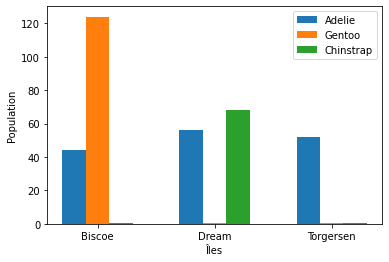

In [10]:
def get_data_for_species(species_name):
    """
    Cette fonction retourne un DataFrame contenant toutes les données de l'espèce `species_name`
    """
    mask_species = data['Species'] == species_name #crée un mask booléen pour sélectionner les manchos qui se trouve sur l'île "island" 
    return data[mask_species] #applique le masque sur le DataFrame


def get_island_count(species, all_island_labels):
    """
    Fonction qui retourne le compte du nombre d'individus de l'espèce `species` dans chaque île dans 
    `all_island_labels` 
    """
    data_species = get_data_for_species(species)
    island_count = data_species['Island'].value_counts(dropna=True) #Compte le nombre d'individus de l'espèce dans chaque île 
    try:   
        island_count = island_count[all_island_labels] #changer l'ordre des indexes pour qu'elles soient uniformes partout
    except:                                            #Si il manque des labels met des 0 au îles où il n'y a personne
        new_count = pd.Series([0.5,0.5,0.5], index=all_island_labels) # Dans ce cas on met 1 au lieu de 0 parce que pyplot ne donne pas des figures élégantes si le diagramme est a 0  
        new_count[island_count.index.values] = island_count            # Dans un contexte professionnel, utiliser une librairy de visualisation plus spécialisé plotly pour ce genre de figure 
        island_count = new_count
    return island_count


def make_grouped_bar_chart(island_labels, species_labels):
    """
    Fonction qui crée uun diagramme a bars groupées ou chaque bande est d'une couleur représentant 
    l'espèce et les groupes représentent les îles.
    """
    x_tick = np.arange(len(species_labels))
    width = 0.2
    for index in x_tick:
        species = species_labels[index]
        island_count = get_island_count(species, island_labels)
        island_labels = island_count.index.tolist()
        island_values = island_count.values
        plt.bar(x_tick + (index - 1)*width, island_values, width)

# Le __main__ commence ici 
all_island_labels = ['Biscoe', 'Dream', 'Torgersen']
all_species_labels = ['Adelie', 'Gentoo', 'Chinstrap']
make_grouped_bar_chart(all_island_labels, all_species_labels)
plt.xlabel("Îles")
plt.ylabel("Population")
x_tick = np.arange(len(all_species_labels))
plt.xticks(x_tick,all_island_labels)
plt.legend(all_species_labels)
plt.show()

### Analyse de variables continues : Le nuage de point
De l'analyse de l'association entre deux variables continues ou la visualisation de positions cartésiennes, le nuage de points est un outil essentiel à tous les domaines. Plusieurs mesures de variables continues sont fournies dans les données. Pouvez vous en choisir 2 et faire afficher une en fonction de l'autre dans la cellule suivante ?

> N'oublier pas de traiter les NaNs

> Essayer de faire une fonction avec votre code

> Défi supplémentaire (optionnel): Utiliser une boucle pour faire afficher toutes les combinaisons possibles !

In [13]:
def get_column_from_data(list_column_name, dataframe):
    """
    Cette fonction retourne un DataFrame ne contenant que les colonnes dans `list_column_name` et sans NaN
    """
    newdata = dataframe[list_column_name]
    return newdata.dropna()
    
    
def get_xy_data(x_axis_name, y_axis_name, dataframe):
    """
    Cette fonction retourne une liste des valeurs dans la colonnes `x_axis_name` et 
    une liste des valeurs dans la colonnes `y_axis_name` du DataFrame `dataframe`.
    """
    xydata = get_column_from_data([x_axis_name, y_axis_name], dataframe)
    return xydata.iloc[:,0].tolist(), xydata.iloc[:,1].tolist()


def make_scatter_from_dataframe(x_axis_name, y_axis_name, dataframe, **kwargs):
    """
    Cette fonction crée un objet scatter dont les coordonnées en x sont trouvé dans la colonne `x_axis_name` 
    et les coordonnées en y dans la colonne `y_axis_name` du `dataframe`.
    """
    x, y = get_xy_data(x_axis_name, y_axis_name, dataframe)
    plt.scatter(x, y, **kwargs)
    
    
def display_all_scatter_figure(**kwargs):
    """
    Cette fonction affiche les figures pour toutes les combinaisons de variables continues données.
    """
    x_axis_names = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
    y_axis_names = [n for n in x_axis_names]
    for x_name in x_axis_names:
        for y_name in y_axis_names: 
            make_scatter_from_dataframe(x_name, y_name, data, **kwargs)
            plt.xlabel(x_name)
            plt.ylabel(y_name)
            plt.title(f'{y_name} en fonction de {x_name} chez la population de manchots')
            plt.show()
        y_axis_names.remove(x_name) # puisque la figure de x en fonction de y et y en fonction de x est essentiellement pareil on enlève la valeur de x de la liste des y pour éviter les répétitions 

    

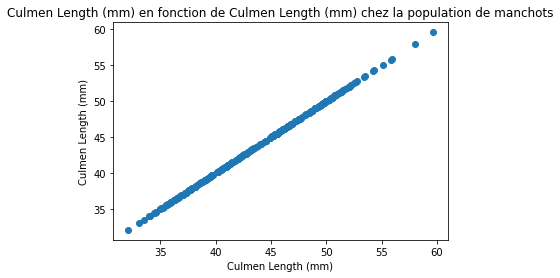

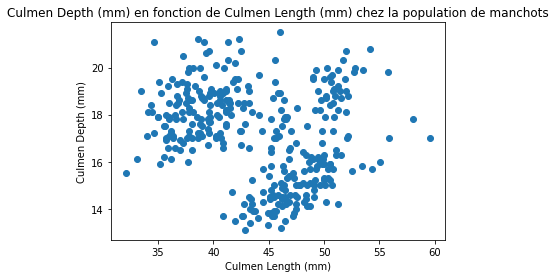

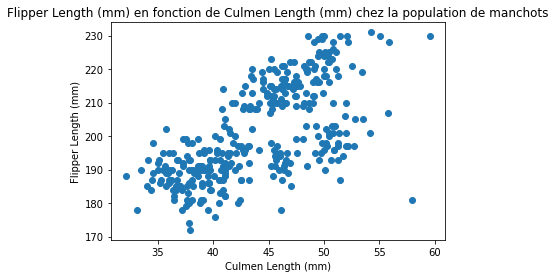

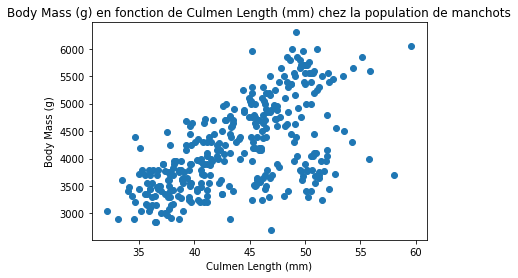

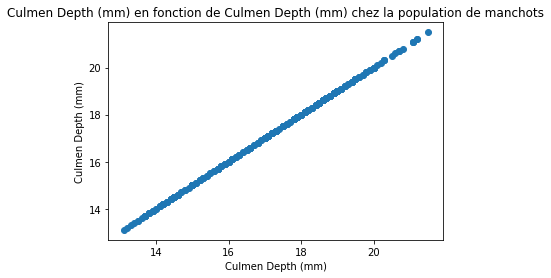

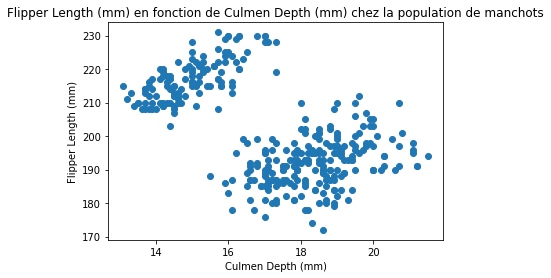

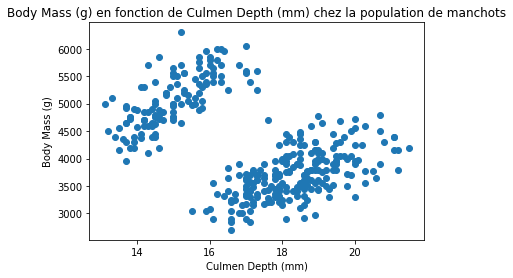

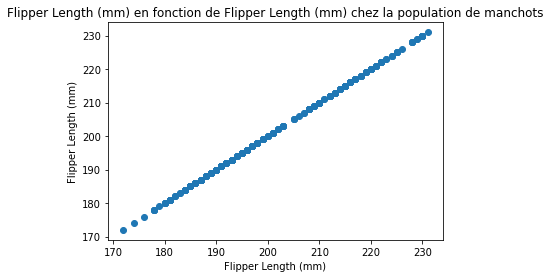

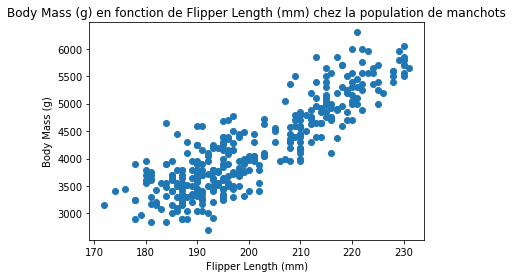

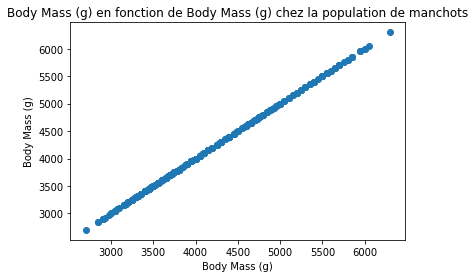

In [14]:
display_all_scatter_figure()

Dépendamment de quelles associations vous avez fait afficher, vous avez peut être remarqué la présence de regroupement de données.

#### Les couleurs, une dimension supplémentaire:
En visualisation, que se soit pour un article ou un devoir en *latex*, nous sommes souvent limités à deux dimensions géométriques pour afficher les données. Pour transmettre plus d'informations, on utilise alors souvent la couleur des points comme troisième dimension.

Pour le choix de couleurs, une librairie très pertinente en python est [seaborn](https://seaborn.pydata.org/) et plus précisément leur outil de choix de [palettes de couleur](https://seaborn.pydata.org/tutorial/color_palettes.html). Les couleurs sont données sous forme de tuple <span style="color:red">R</span><span style="color:green">G</span><span style="color:blue">B</span> et donc compatible avec toute librairie de visualisation de données (incluant pyplot). Son utilisation n'est pas obligatoire, mais est fortement recommandée dans la suite des exercices et dans vos travaux futurs. Les liens hypertext vous conduirons vers les ressources nécessaires pour votre apprentissage.

Pour le prochain exercice, refaire l'exercice précédent en encodant une troisième variable dans les couleurs des points du nuage. Essayer d'incorporer les palettes de seaborn (importé sous le nom `sns`)! Nous vous recommandons de commencer par colorer les points en fonction de leur espèce ou île. Par la suite, essayer différentes variables et différentes couleurs/palettes !

> Si la troisième variable est continue, la palette de couleur devrait être continue et une échelle de couleur devrait être visible pour savoir quelles couleurs représentent quoi.

In [18]:
def get_x_y_color_data(x_axis_name, y_axis_name, color_axis, color_palette='deep', dataframe=data):
    """
    Cette fonction retourne une liste des valeurs de la colonnes `x_axis_name`, 
    une liste des valeurs dans la colonnes `y_axis_name` du DataFrame `dataframe`, une liste des couleurs 
    et une liste des labels assignées aux couleurs. Une figure sera assignée à chaque couleur, alors les listes
    contiennent une liste pour chaque figure ex : list_x = [[coordonnées x de la figure 1], 
    [coordonnées x de la figure 2],...]
    """
    xycolor = get_column_from_data([x_axis_name, y_axis_name, color_axis], dataframe)
    x, y, values_to_map = xycolor.iloc[:,0], xycolor.iloc[:,1], xycolor.iloc[:,2]    
    unique_val_to_map = values_to_map.unique()
    palette = sns.color_palette(color_palette, unique_val_to_map.shape[0])
    colormap = {val : palette[index] for index,val in enumerate(unique_val_to_map)}
    colors = values_to_map.map(colormap)
    list_x, list_y, list_color = [], [], []
    for color_val in unique_val_to_map:
        mask = values_to_map == color_val
        list_x.append(x[mask].tolist())
        list_y.append(y[mask].tolist())
        list_color.append(colors[mask])
    return list_x, list_y, list_color, unique_val_to_map


def make_scatter_from_dataframe(x_axis_name, y_axis_name, color_axis, color_palette='deep', dataframe=data):
    """
    Cette fonction crée des objets scatter dont les coordonnées en x sont trouvé dans la colonne `x_axis_name`, 
    les coordonnées en y dans la colonne `y_axis_name` du `dataframe`. De plus, la palette `color_palette` est
    assigné aux valeurs de `color_axis`. Un objet scatter est créée pour chaque couleur.
    """
    x, y, color, value_of_color = get_x_y_color_data(x_axis_name, y_axis_name, color_axis, color_palette, dataframe)
    for i in range(len(x)):
        plt.scatter(x[i], y[i],c=color[i])
    plt.legend(value_of_color)


def display_all_scatter_figure(color_axis, color_palette='deep'):
    """
    Cette fonction affiche les figures pour toutes les combinaisons de variables continues données.
    """
    x_axis_names = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
    y_axis_names = [n for n in x_axis_names]
    for x_name in x_axis_names:
        for y_name in y_axis_names: 
            make_scatter_from_dataframe(x_name, y_name, color_axis, color_palette, data)
            plt.xlabel(x_name)
            plt.ylabel(y_name)
            plt.title(f'{y_name} en fonction de {x_name} chez la population de manchots')
            plt.show()
        y_axis_names.remove(x_name) # puisque la figure de x en fonction de y et y en fonction de x est essentiellement pareil on enlève la valeur de x de la liste des y pour éviter les répétitions 


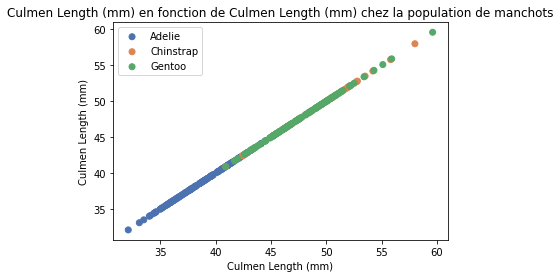

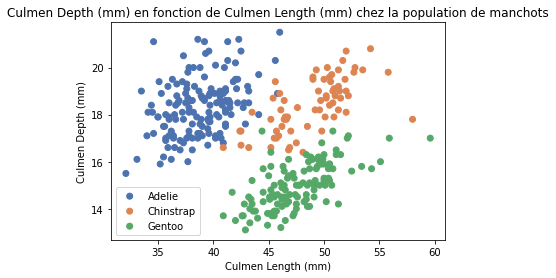

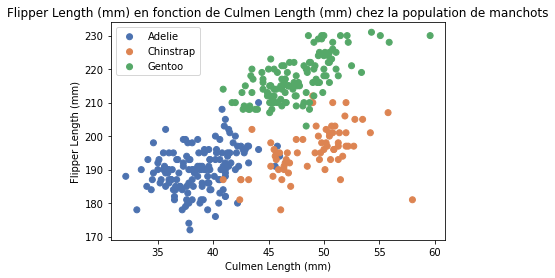

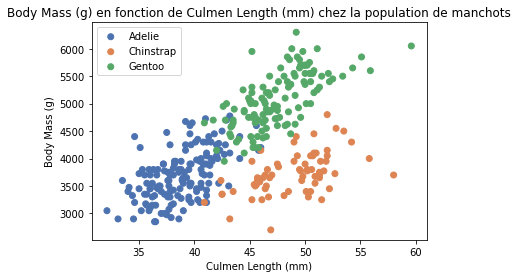

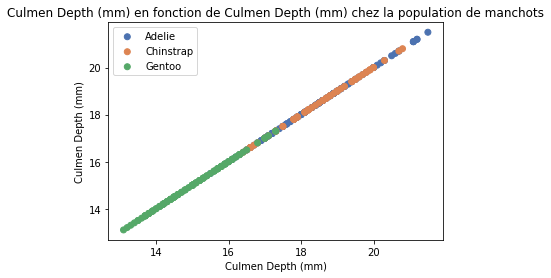

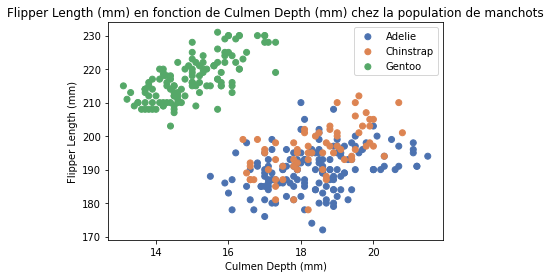

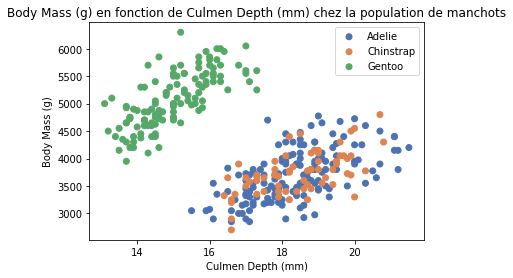

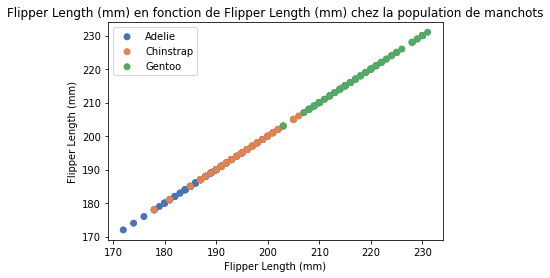

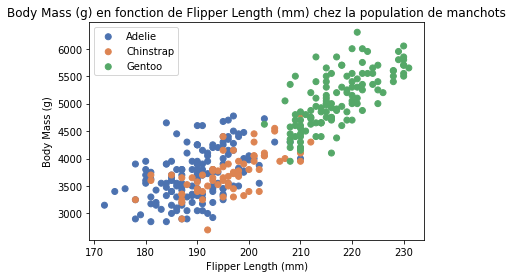

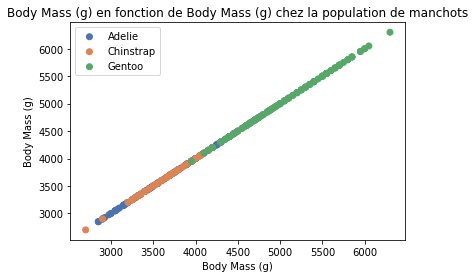

In [19]:
display_all_scatter_figure('Species')

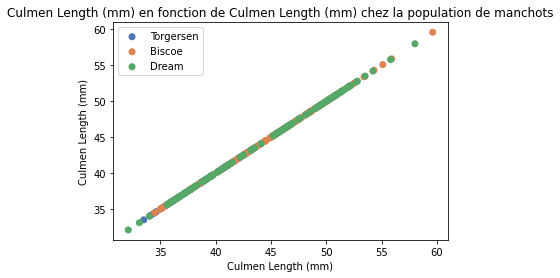

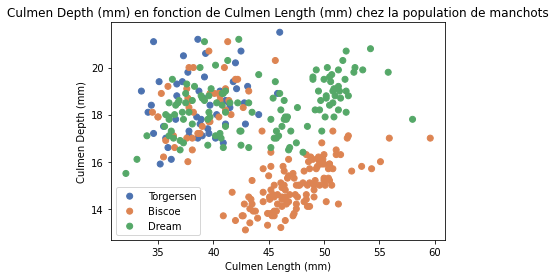

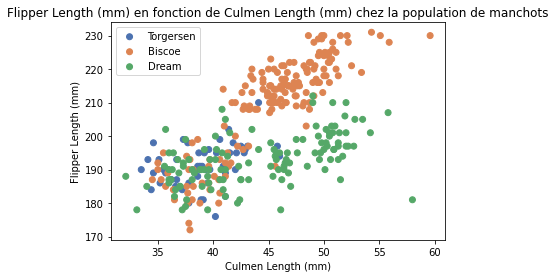

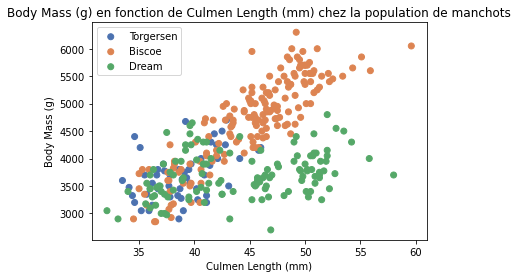

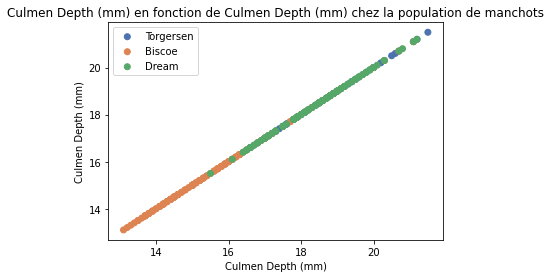

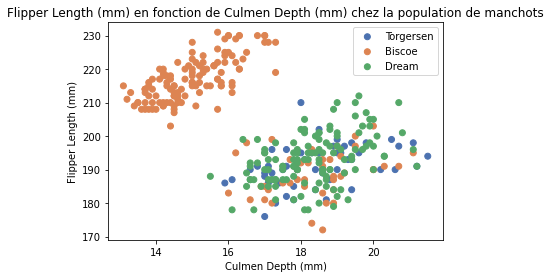

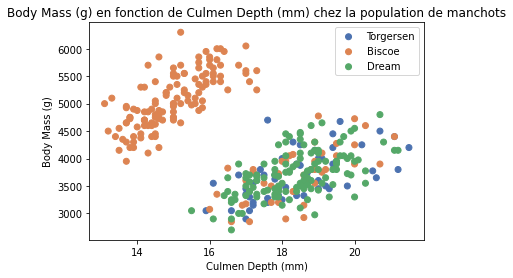

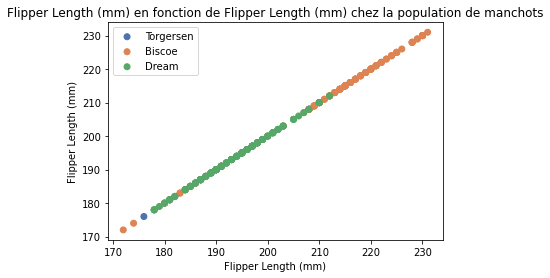

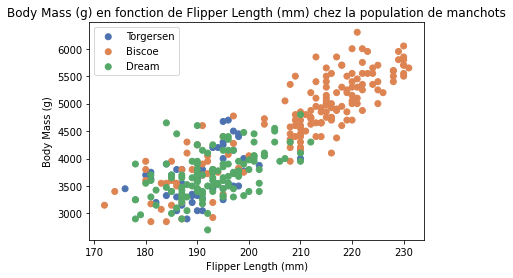

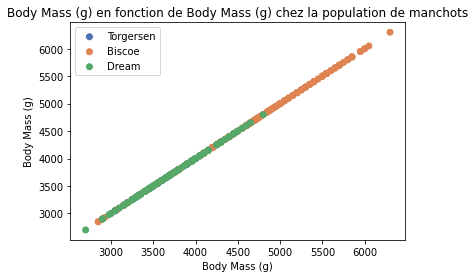

In [20]:
display_all_scatter_figure('Island')

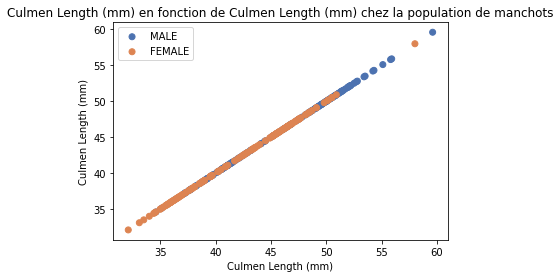

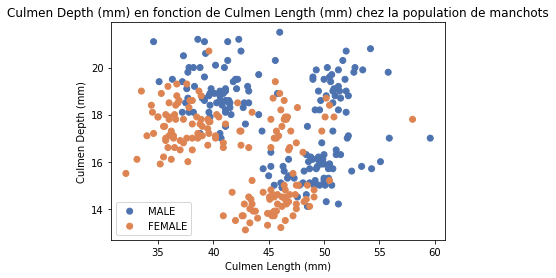

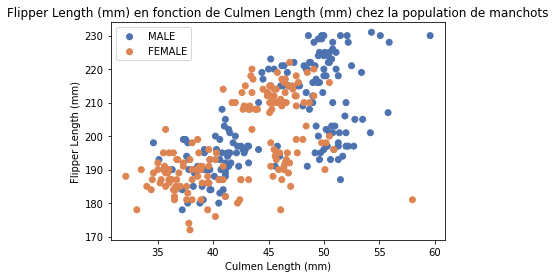

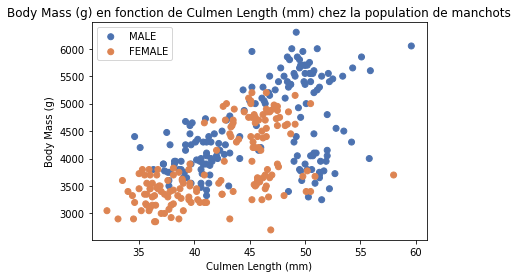

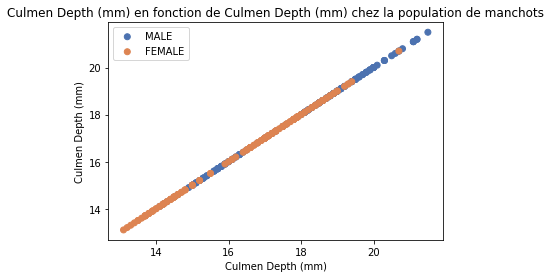

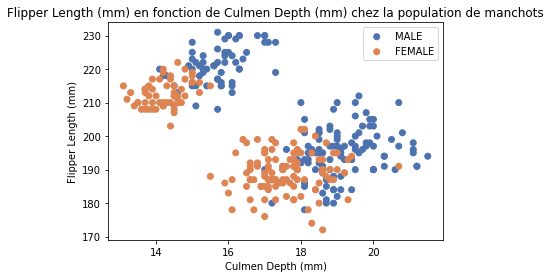

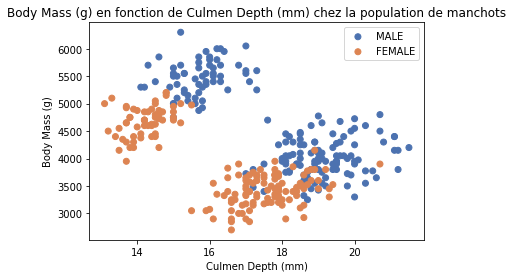

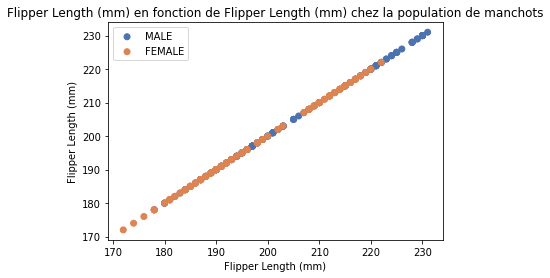

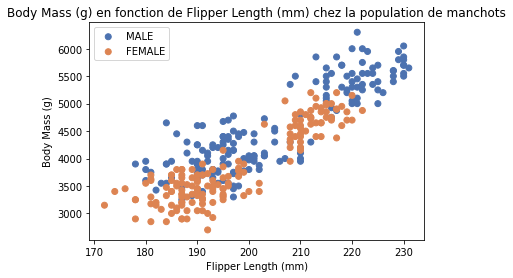

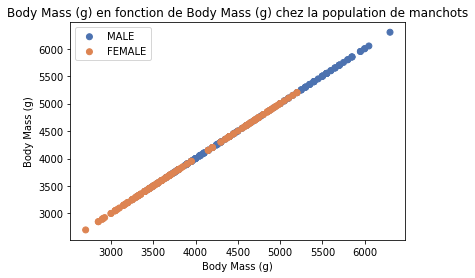

In [21]:
display_all_scatter_figure('Sex')

En ajoutant seulement quelques couleurs à vos précédentes figures, vous devriez déjà être en mesure de tirer des conclusions intéressantes sur les différentes populations de manchots de l'archipel ! Là est le pouvoir de la visualisation ! Si en un coup d'oeil, un lecteur non-informé est capable de voir quelles espèces se distinguent du reste (et comment) ou sur quels attributs les femelles sont différente des mâles, vous avez bien fait votre travail !

#### Question Bonus
Avec le nuage de point il existe une autre méthode que la couleur permettant d'ajouter de l'information. Êtes-vous capable de la nommer ? Si oui, reprennez un de vos exemples précédents et ajouter cette nouvelle dimension.

In [29]:
# Deux réponses possible :
# Premièrement la taille des points pour des variables continues, mais cela peut rapidement rendre votre figure illisible
# Deuxièmement la forme des points peut encoder une variable discrète en voici un exemple avec le sexe :
def get_x_y_color_sexe_data(x_axis_name, y_axis_name, color_axis, color_palette='deep', dataframe=data):
    """
    Cette fonction retourne une liste des valeurs dans la colonnes `x_axis_name`, 
    une liste des valeurs dans la colonnes `y_axis_name` du DataFrame `dataframe`, une liste des couleurs 
    et une liste des labels assignées aux couleurs. Une figure sera assignée à chaque couleur alors les listes
    contiennent une liste pour chaque figure ex : list_x = [[coordonnées x de la figure 1], 
    [coordonnées x de la figure 2],...]
    """
    xycolor = get_column_from_data([x_axis_name, y_axis_name, color_axis, 'Sex'], dataframe)
    x, y, values_to_map, sexe = xycolor.iloc[:,0], xycolor.iloc[:,1], xycolor.iloc[:,2], xycolor.iloc[:,3]    
    unique_val_to_map = values_to_map.unique()
    palette = sns.color_palette(color_palette, unique_val_to_map.shape[0])
    all_markers = ['o', '^']
    colormap = {val : palette[index] for index, val in enumerate(unique_val_to_map)}
    colors = values_to_map.map(colormap)
    list_x, list_y, list_colors, list_markers = [], [], [], []
    for color_val in unique_val_to_map:
        colormask = values_to_map == color_val
        for index2, sex in enumerate(['MALE', 'FEMALE']):
            sexmask = sexe == sex
            list_x.append(x[colormask & sexmask].tolist())
            list_y.append(y[colormask & sexmask].tolist())
            list_colors.append(colors[colormask & sexmask])
            list_markers.append(all_markers[index2])
    return list_x, list_y, list_colors, unique_val_to_map, list_markers


def make_scatter_from_dataframe_with_marker(x_axis_name, y_axis_name, color_axis, color_palette='deep', dataframe=data):
    """
    Cette fonction crée des objets scatter dont les coordonnées en x sont trouvé dans la colonne `x_axis_name`, 
    les coordonnées en y dans la colonne `y_axis_name` du `dataframe`. De plus, la palette `color_palette` est
    assigné aux valeurs de `color_axis`. Un objet scatter est créée pour chaque couleur.
    """
    x, y, color, value_of_color, markers = get_x_y_color_sexe_data(x_axis_name, y_axis_name, color_axis, color_palette, dataframe)
    for i in range(len(x)):
        plt.scatter(x[i], y[i],c=color[i], marker=markers[i])
    legend = []
    for val in value_of_color:
        for sex in ['mâle', 'femelle']:
            legend.append(f'{val} {sex}')
    plt.legend(legend)


def display_all_scatter_figure_marker(color_axis, color_palette='deep'):
    """
    Cette fonction affiche les figures pour toutes les combinaisons de variables continues données.
    """
    x_axis_names = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
    y_axis_names = [n for n in x_axis_names]
    for x_name in x_axis_names:
        for y_name in y_axis_names: 
            make_scatter_from_dataframe_with_marker(x_name, y_name, color_axis, color_palette, data)
            plt.xlabel(x_name)
            plt.ylabel(y_name)
            plt.title(f'{y_name} en fonction de {x_name} chez la population de manchots')
            plt.show()
        y_axis_names.remove(x_name) # puisque la figure de x en fonction de y et y en fonction de x est essentiellement pareil on enlève la valeur de x de la liste des y pour éviter les répétitions 


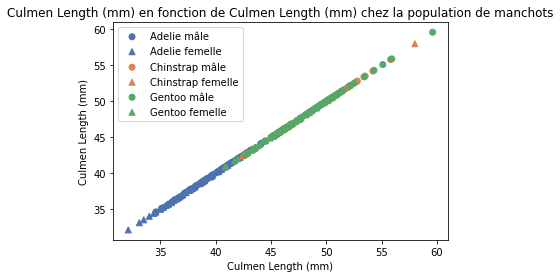

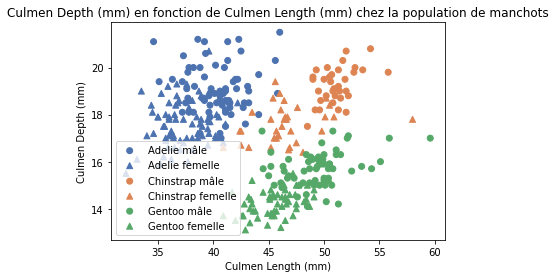

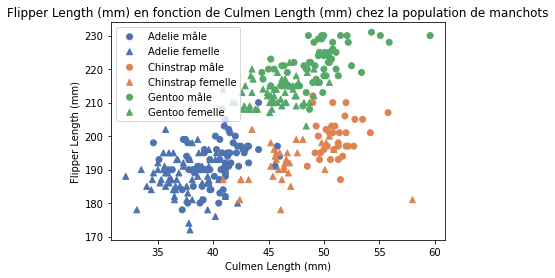

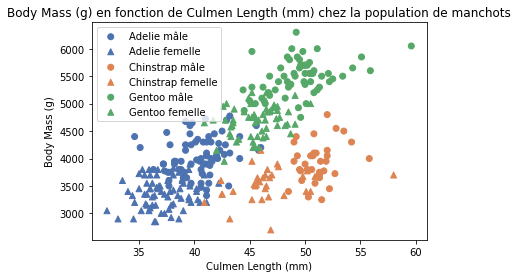

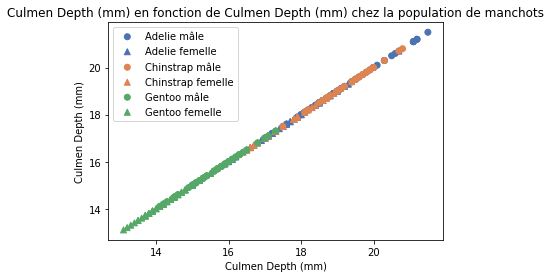

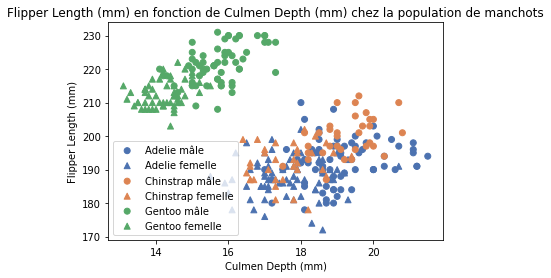

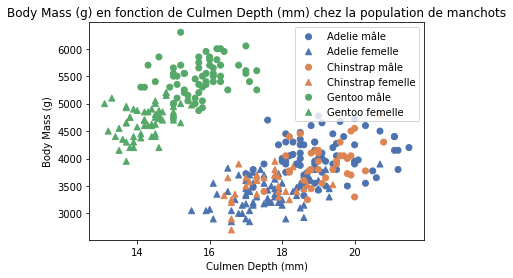

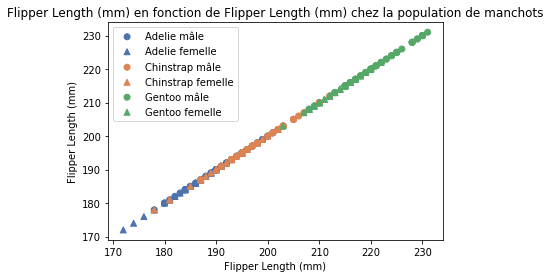

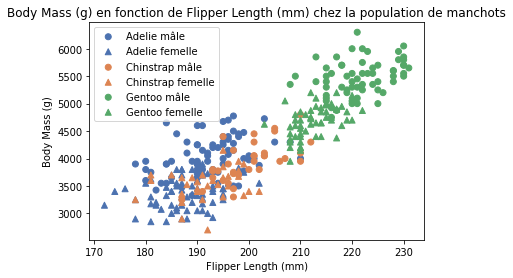

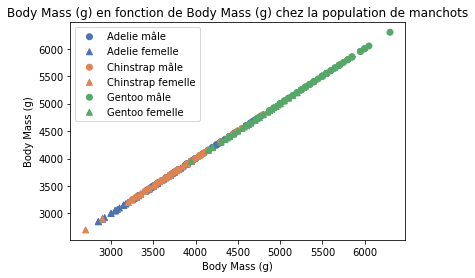

In [30]:
display_all_scatter_figure_marker('Species')

### Analyse en une dimension : l'histogramme
L'histogramme est une figure souvent utilisée pour visualiser les distributions de variables continues. En segmentant l'espace en *bin* et en comptant la prévalence dans chacun, on peut estimer la distribution. La clef est de choisir la bonne taille de *bin*. En utilisant la fonction de `matplotlib`, prennez une variable continue et affichez sa distribution.

In [ ]:
def show_all_histograms(list_variables, dataframe, **kwargs):
    """
    Fonction qui itère sur la liste des noms de variables `list_variables` et génère et affiche un 
    histogramme pour chaque.
    """
    density = kwargs.get('density',False)
    bins = kwargs.get('bins',10)
    for var in list_variables:
        data_to_plot = get_column_from_data(var, dataframe).to_numpy()
        plt.hist(data_to_plot, **kwargs)
        plt.xlabel(var)
        plt.ylabel('Densité' if density else 'Occurence')
        plt.title(f'La distribution de {var} chez la population de manchots. bins = {bins}')
        plt.show()


In [ ]:
variable_names = [ 'Flipper Length (mm)','Culmen Length (mm)', 'Body Mass (g)', 'Culmen Depth (mm)']
show_all_histograms(variable_names, data, density=True)

Essayez maintenant de changer la taille des *bins* pour voir ce qui se produit et normalisez le résultat. N'hésitez pas d'utiliser des valeurs ridicules pour bien voir ce qui se produit en changeant les *bins*.

In [ ]:
for bin_size in [3, 20, 30, 100]:
    show_all_histograms(variable_names, data, bins=bin_size, density=True)

Qu'arrive-t-il lorsque vous changez les *bins* ? Est-ce qu'un plus gros nombre est toujours mieux ? Expliquez pourquoi. De plus, pour certaines variables vous devriez observer la présence de modes (plus d'un pics) dans la distribution. En vous basant sur les conclusions tirées des figures précédentes, êtes-vous capable de déduire ce qui peut expliquer ce phénomène ? 
### Exercice optionnel
Il est possible de combiner les histogrammes avec une figure a points reliés. Calculez la moyenne et l'écart-type de la variable choisi. Tracer la distribution normale (gaussienne) correspondant a cette moyenne et écart-type et superposer cette figure à l'histogramme de cette variable. Est-ce que les deux figures concordent ? 

> Indice : une fonction gausienne est de forme : 
\begin{align} 
y = \frac{1}{\sigma \sqrt{2 \pi}} \exp \left(-\frac{(x-\mu)^{2}}{2 \sigma^{2}}\right)
\end{align}
Où $\mu$ est la moyenne et $\sigma$ est l'écart type

In [57]:
def get_avg_std(values):
    """
    Fonction qui retourne la moyenne et l'écart-type d'une liste de valeurs.
    """
    return np.mean(values), np.std(values)


def make_normal_distribution(mean, std, bins=10):
    """
    Fonction qui calcul et génère la figure d'une distribution normale selon une moyenne et un écart-type
    donnée, dans le range [mean - 3*std, mean + 3*std].
    """
    gaussian = lambda x: (1/(std*np.sqrt(2*np.pi)))*np.exp(-((x - mean)**2)/(2*std**2)) #fonction gaussienne
    x_values = np.linspace(mean-3*std, mean+3*std, 1000)
    plt.plot(x_values, gaussian(x_values), color='red')

    
def show_all_histograms_with_dist(list_variables, dataframe, **kwargs):
    """
    Fonction qui affiche la distribution de toutes les variables dans `list_variables` selon les paramètres
    de plt.hist dans kwargs. Un fit de la distribution normale associée a la distribution est aussi affiché
    """
    density = kwargs.get('density',False)
    bins = kwargs.get('bins',10)
    for var in list_variables:
        data_to_plot = get_column_from_data(var, dataframe).to_numpy()
        mean, std = get_avg_std(data_to_plot)
        plt.hist(data_to_plot, **kwargs)
        make_normal_distribution(mean, std, bins*10)
        plt.xlabel(var)
        plt.ylabel('Densité' if density else 'Occurence')
        plt.title(f'La distribution de {var} chez la population de manchots. bins = {bins}')
        plt.show()

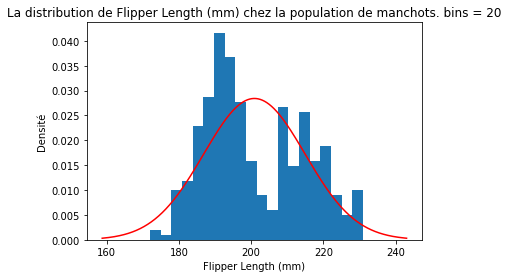

In [58]:
show_all_histograms_with_dist(['Flipper Length (mm)'], data, bins=20, density=True)

# Conclusion
Merci d'avoir participé à cet atelier, j'espère qu'il vous a permis de solidifier les concepts appris aujourd'hui. Pour vérifier votre code, vous pouvez toujours consulter le corrigé qui devrait se trouver dans le même dossier que le présent fichier. S'il y a un message que nous aimerions vous avoir fait passer est l'importance de la visualisation et la manière dont des figures bien réalisées peuvent instantanément transmettre un message.

Bien que `matplotlib` soit une excellente librairie de visualisation il est important de savoir qu'il existe d'autres librairie python permettant d'accomplir des figures plus complexe tout en simplifiant le code nécessaire. Les principales sont `seaborn`, ❤️ `plotly` ❤️, `Bokeh`, `altair`, `folium` et même directement avec les DataFrames de `pandas`. Chacune ont leurs avantages et inconvénients, alors si le sujet vous intéresse, n'hésitez pas à faire des recherches pour trouver ce qui vous convient le plus ! 